In [45]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/pumpkin-seeds-dataset")

print("Path to dataset files:", path)

100%|██████████| 393k/393k [00:00<00:00, 67.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/pumpkin-seeds-dataset/versions/1


In [19]:
# Load DataFrame
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [20]:
# DataFrame Informatiom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [23]:
# Unique
df["Class"].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [29]:
# Converting string to Number
df["Class"] = df["Class"].replace(['Çerçevelik', 'Ürgüp Sivrisi'], [1, 0])

/tmp/ipython-input-1841607161.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Class"] = df["Class"].replace(['Çerçevelik', 'Ürgüp Sivrisi'], [1, 0])


In [33]:
# Counting
df[df["Class"] == 1]["Area"]

,Area
0,56276
1,76631
2,71623
3,66458
4,66107
...,...
1295,64276
1296,77715
1297,69528
1298,59466


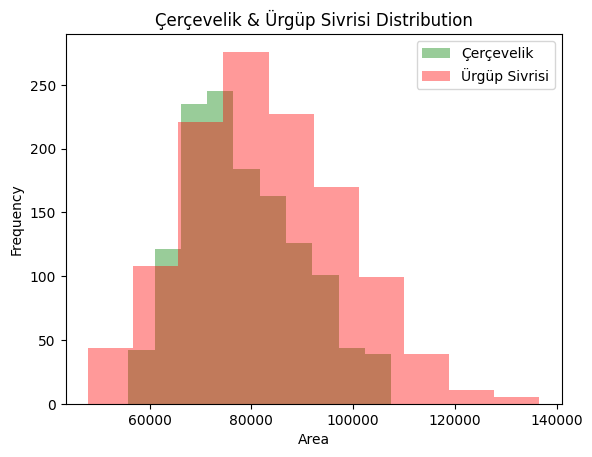

In [84]:
# Ploting Çerçevelik & Ürgüp Sivrisi HistPlot for Area

plt.hist(df[df["Class"] == 1]["Area"],color="g",alpha=0.4,label="Çerçevelik")
plt.hist(df[df["Class"] == 0]["Area"],color="r",alpha=0.4,label="Ürgüp Sivrisi")
plt.title("Çerçevelik & Ürgüp Sivrisi Distribution")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.legend()
plt.show()

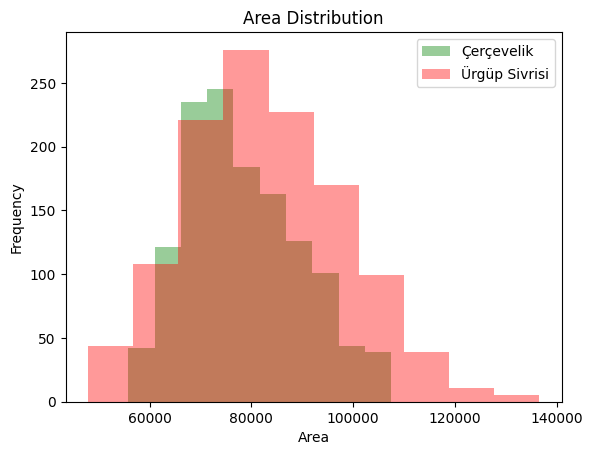

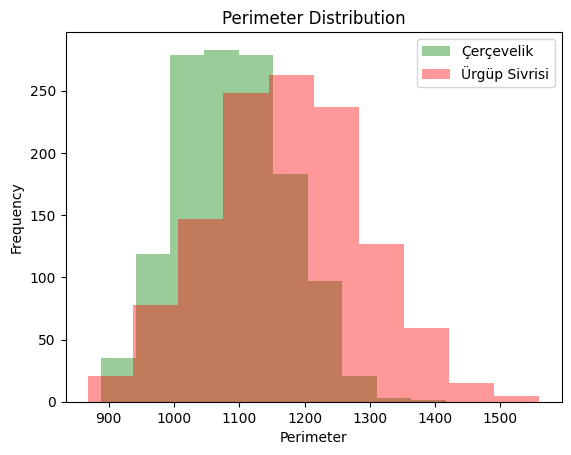

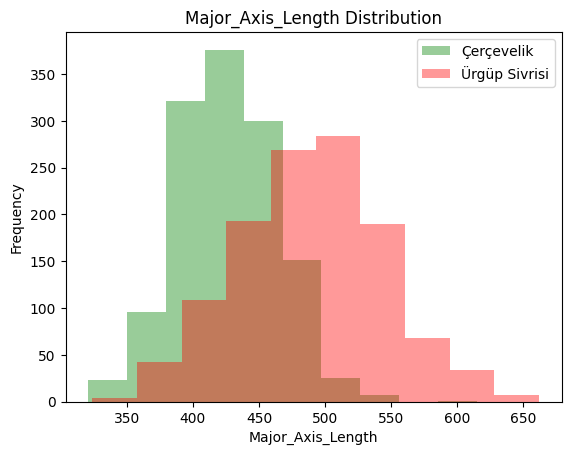

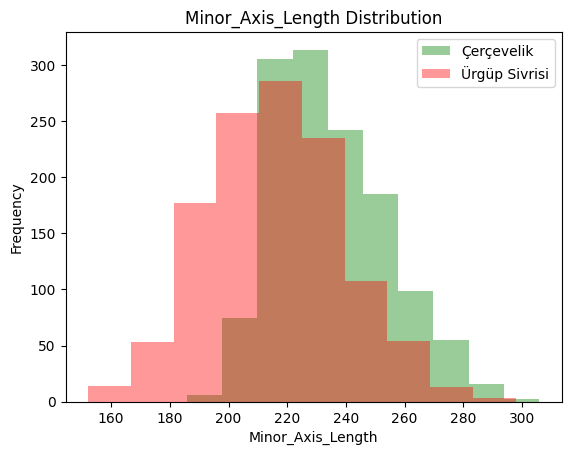

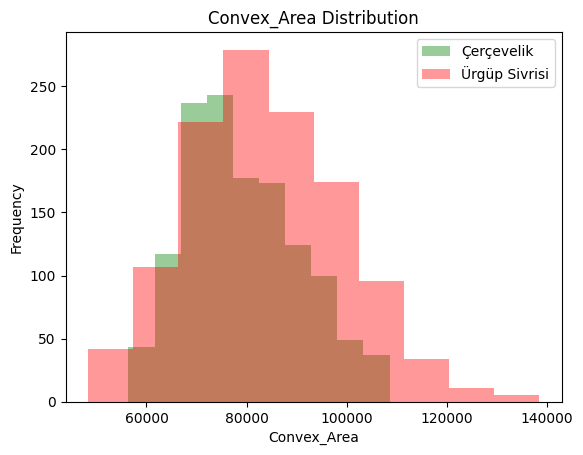

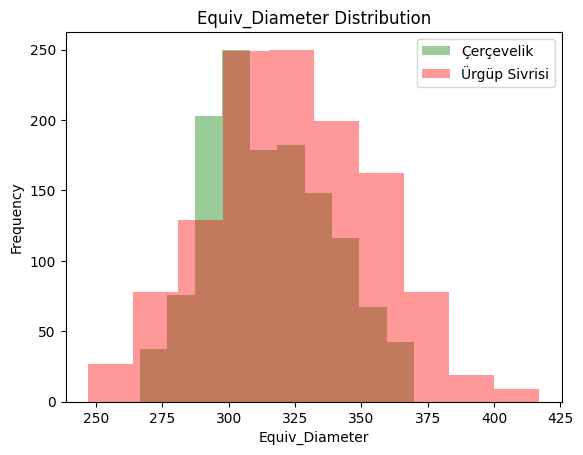

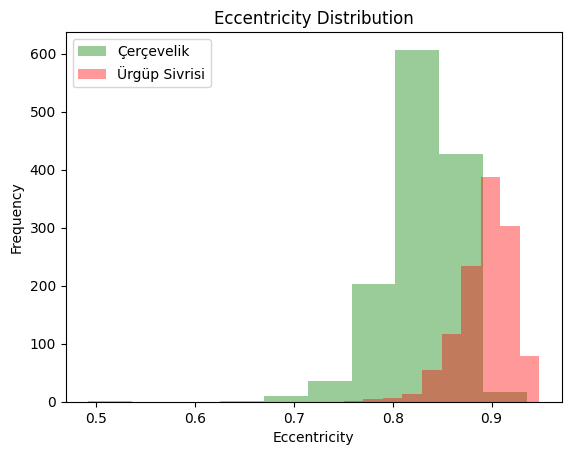

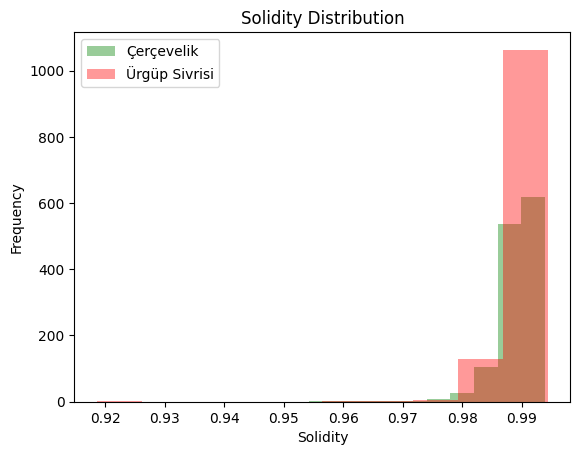

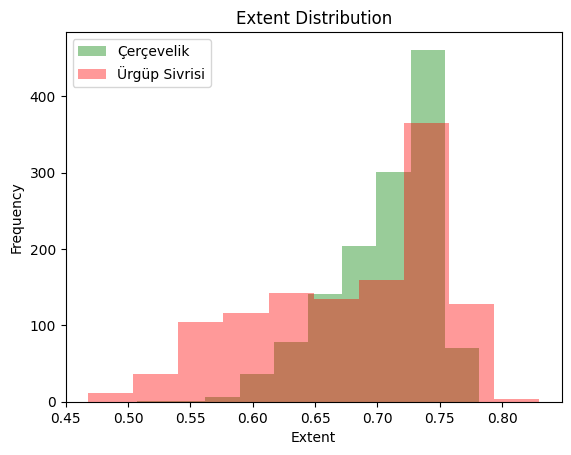

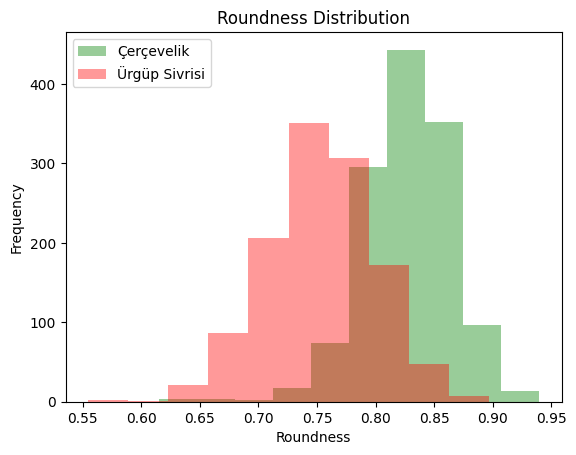

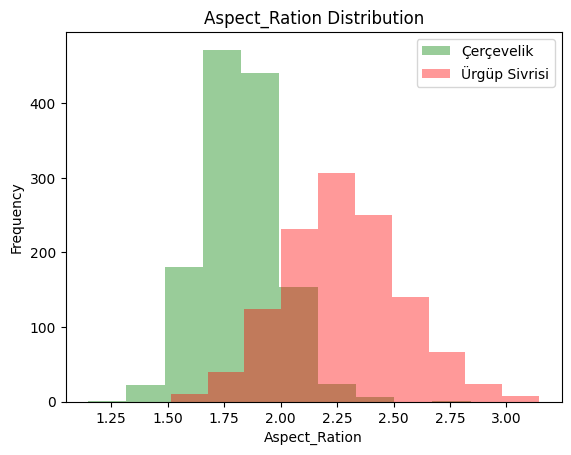

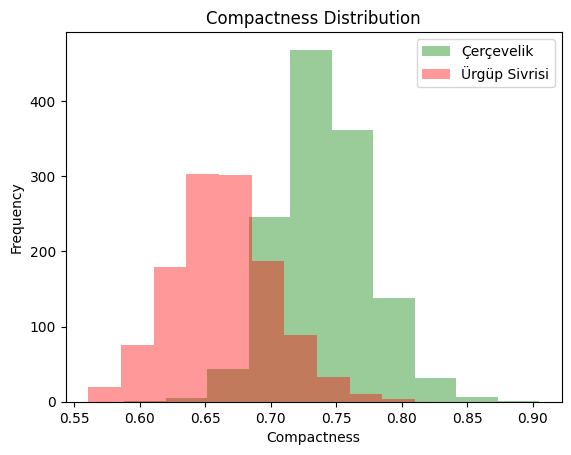

In [35]:
# Graph for each Columns
for col in df.columns[:-1]:
  plt.hist(df[df["Class"] == 1][col],color="g",alpha=0.4,label="Çerçevelik")
  plt.hist(df[df["Class"] == 0][col],color="r",alpha=0.4,label="Ürgüp Sivrisi")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(col + " Distribution")
  plt.legend()
  plt.show()

In [36]:
# For Çerçevelik Dataframe
len(df[df["Class"] == 1])

1300

In [37]:
# For Ürgüp Sivrisi Dataframe
len(df[df["Class"] == 0])

1200

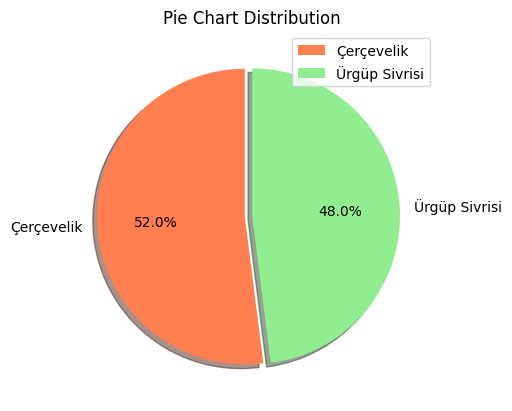

In [86]:
# Ploting Pie Chart Distribution
plt.pie([len(df[df["Class"] == 1]),len(df[df["Class"] == 0])],autopct='%1.1f%%',colors=["coral", "lightgreen"],
        labels=["Çerçevelik","Ürgüp Sivrisi"],startangle=90,shadow=True,explode = (0.05, 0))
plt.title("Pie Chart Distribution")
plt.legend()
plt.show()

In [67]:
# DataFrame Correlation
df.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,-0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,-0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,-0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,-0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,-0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,-0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,-0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,0.669514


<Axes: >

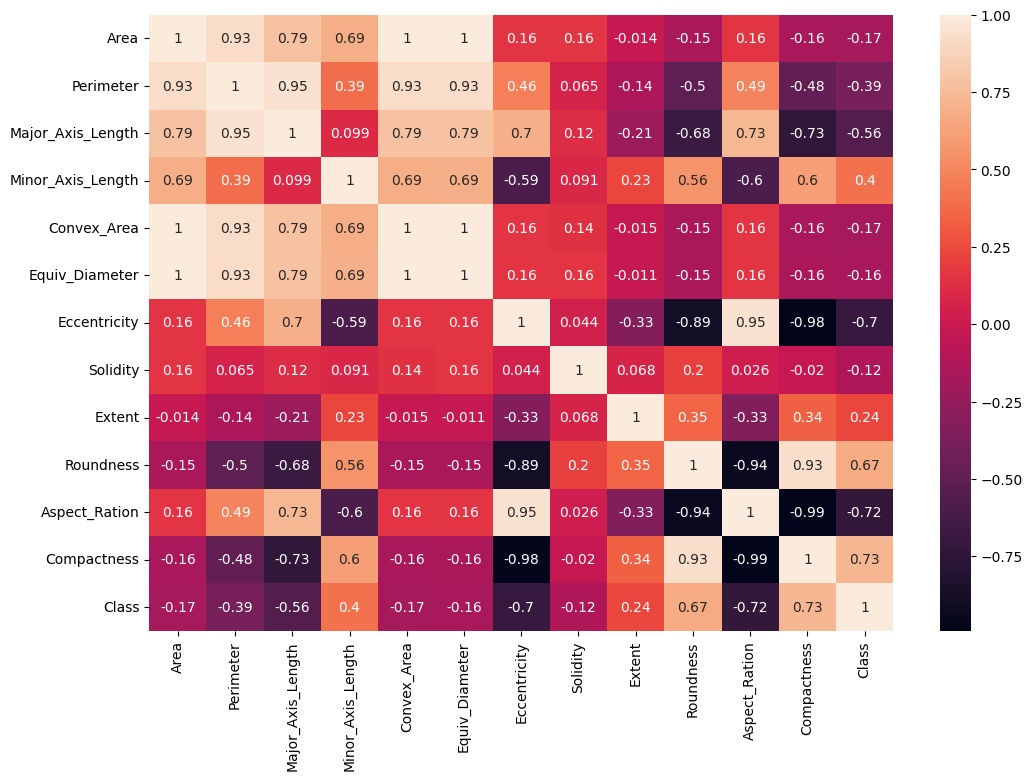

In [72]:
# Finding Correlation through Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [87]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [90]:
# Creating x and y
x = df[["Major_Axis_Length","Extent","Roundness","Compactness"]]
y = df["Class"]
ran = RandomOverSampler()
x_resampled, y_resampled = ran.fit_resample(x, y)

In [91]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=11)

In [92]:
# Model
seed_classifier = RandomForestClassifier(n_estimators=100,random_state=18)
seed_classifier.fit(x_train,y_train)
y_pred = seed_classifier.predict(x_test)

In [93]:
# Classification to Know Accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       279
           1       0.87      0.87      0.87       241

    accuracy                           0.88       520
   macro avg       0.88      0.88      0.88       520
weighted avg       0.88      0.88      0.88       520



In [97]:
# Creating Pickle File
import pickle
with open("Seed_Identifer.pkl","wb") as f:
  pickle.dump(seed_classifier,f)

In [98]:
# Loading Pickle File
import pickle
with open("Seed_Identifer.pkl","rb") as f:
  load_data = pickle.load(f)